# US POLICE SHOOTING DATA ANALYSIS

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
shooting_orj_df = pd.read_csv("data/shootings.csv")
df = shooting_orj_df.copy()
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


**Searching Missing Values**

In [3]:
df.isnull().sum()*100/df.shape[0]

id                         0.0
name                       0.0
date                       0.0
manner_of_death            0.0
armed                      0.0
age                        0.0
gender                     0.0
race                       0.0
city                       0.0
state                      0.0
signs_of_mental_illness    0.0
threat_level               0.0
flee                       0.0
body_camera                0.0
arms_category              0.0
dtype: float64

There is no missing values at Data set.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

**Changing date variables to a datetime variable**

In [5]:
df["date_time"] = pd.to_datetime(df.date, infer_datetime_format=True)

**Change of deaths per time**

In [6]:
date_df = pd.DataFrame(df.groupby(df.date_time.dt.year).count())
date_df = pd.DataFrame(index = date_df.index)
lst = []
for x in range(len(date_df)):
    lst.append(df.groupby(df.date_time.dt.year).count().id.iloc[x])
    
date_df["counts"] = lst

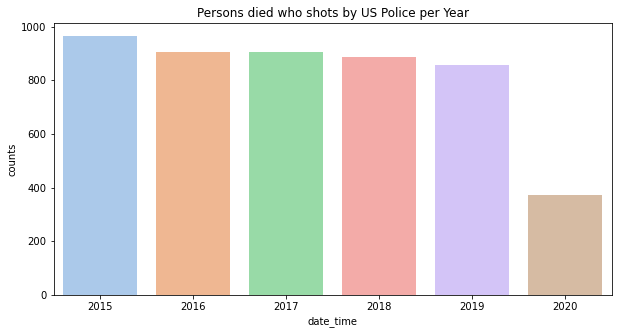

In [7]:
plt.figure(figsize = (10,5))
sns.barplot(x = date_df.index, y = date_df.counts, data = date_df,  palette = "pastel")
plt.title("Persons died who shots by US Police per Year")
plt.show()

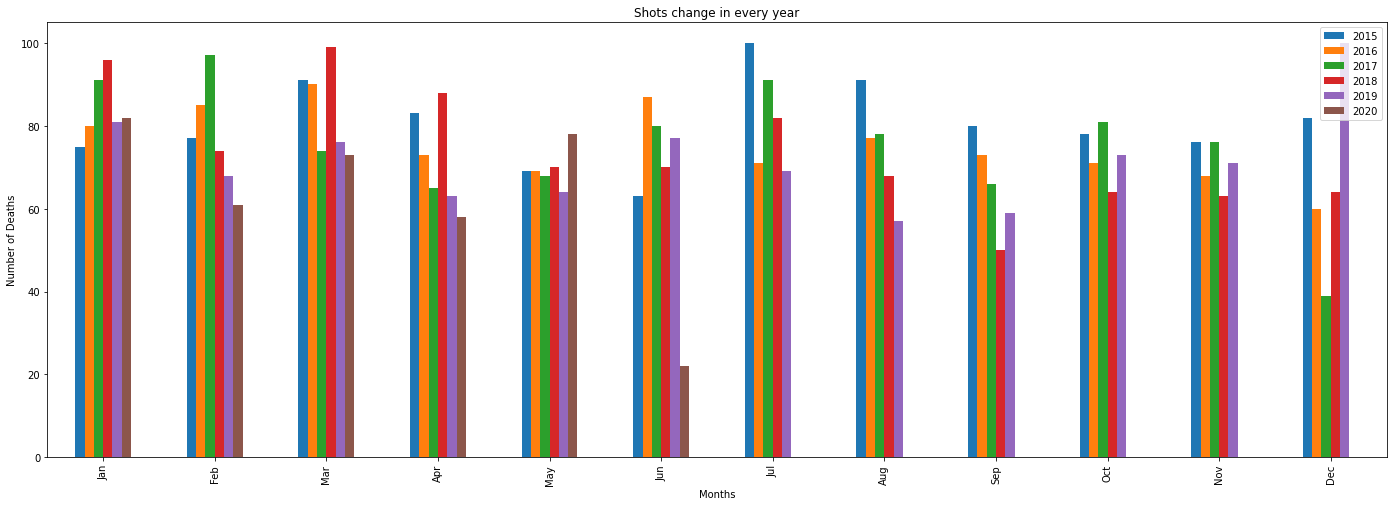

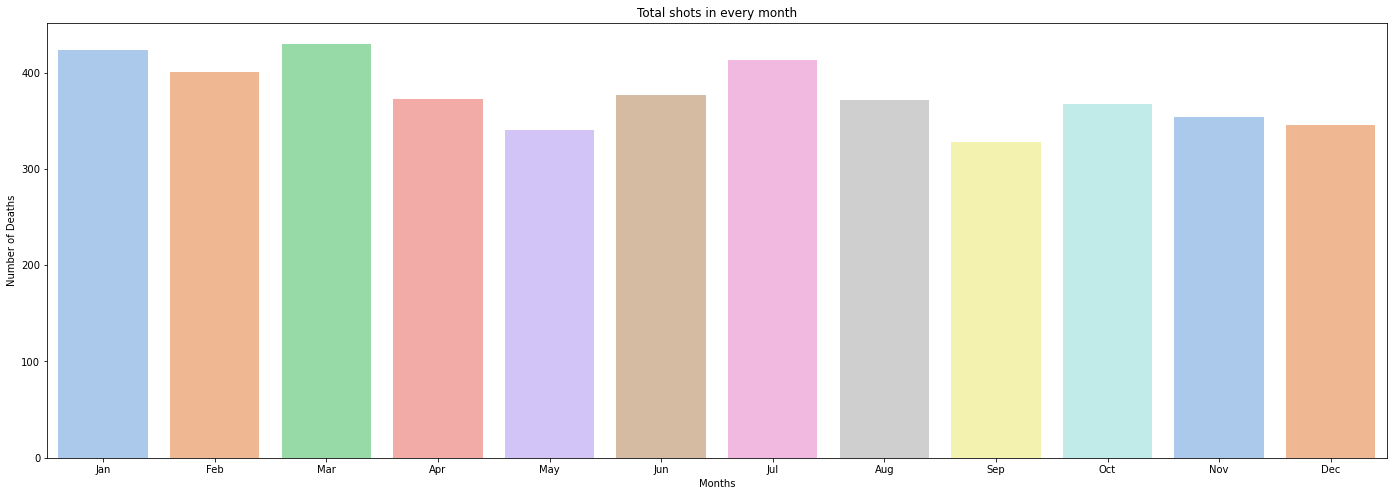

In [8]:
def con_per_year(year):    
    date_df = pd.DataFrame(df.groupby(df.date_time.iloc[df[df.date_time.dt.year == year].index].dt.month).count())
    lst = []
    for x in range(len(date_df)):
        lst.append(date_df.id.iloc[x])
        
    date_df = pd.DataFrame(index = date_df.index)
    date_df[year] = lst
    return date_df[year]

month_str = ["Jan", "Feb", "Mar", "Apr", "May","Jun","Jul", "Aug", "Sep","Oct","Nov","Dec"]
years = df.groupby(df.date_time.dt.year).count()
legend = []
sample = pd.DataFrame()

for x in years.index:
    sample[x] = con_per_year(x)
    legend.append(x)

sample.index = month_str
sample.plot(kind="bar", figsize=(24,8))
plt.legend(legend)
plt.title("Shots change in every year")
plt.xlabel("Months")
plt.ylabel("Number of Deaths")
plt.show()
plt.figure(figsize=(24,8))
months = pd.DataFrame(df.groupby(df.date_time.iloc[df[df.date_time.dt.year < 2020].index].dt.month).count())
months = pd.DataFrame(index = months.index)
lst = []
for x in range(len(months)):
    lst.append(df.groupby(df.date_time.iloc[df[df.date_time.dt.year < 2020].index].dt.month).count().id.iloc[x])
    

months["counts"] = lst
sns.barplot(x = month_str, y = months.counts, palette = "pastel")
plt.title("Total shots in every month")
plt.xlabel("Months") 
plt.ylabel("Number of Deaths")
plt.show()

Conclusion of this graph is crime rates decrease towards the end of the year.

**Deaths by Gender**

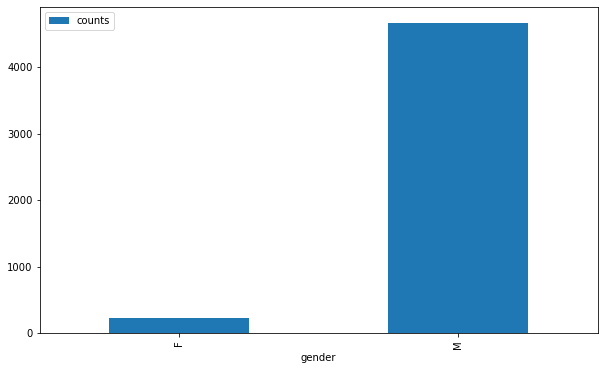

In [9]:
genders = df.groupby(df.gender).id.count()
genders
count = []
for x in range(len(genders)):
    count.append(genders.iloc[x])
genders = pd.DataFrame(index = genders.index)
genders["counts"] = count
genders.plot(kind="bar", figsize=(10,6))
plt.show()

**Death numbers by States**

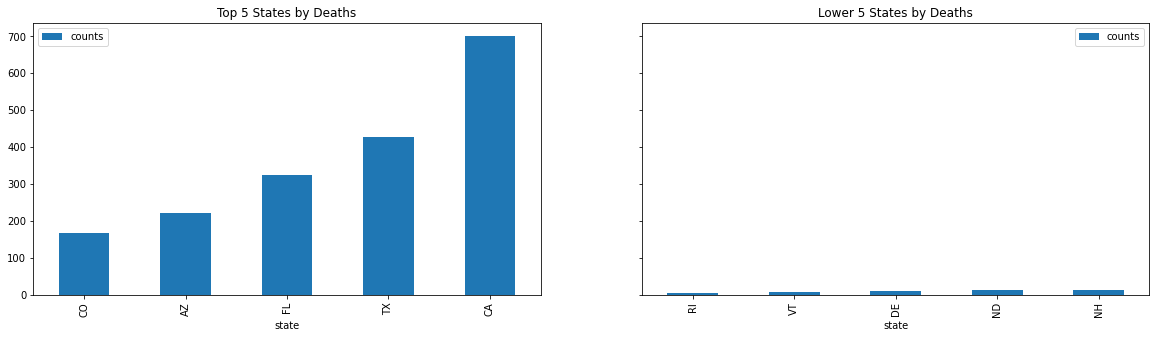

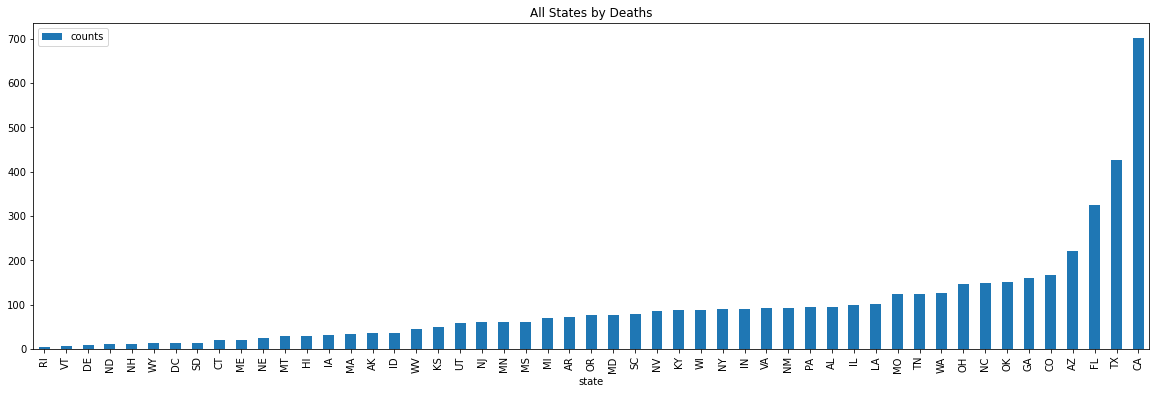

In [10]:
states = df.groupby(df.state).id.count()
count = []
for x in range(len(states)):
    count.append(states.iloc[x])
states = pd.DataFrame(index = states.index)
states["counts"] = count

s_tail = states.sort_values(by = "counts").head()
s_head = states.sort_values(by = "counts").tail()
states = states.sort_values(by = "counts")

fig, axes = plt.subplots(nrows=1, ncols=2 , sharey = True)
s_head.plot.bar(ax=axes[0],figsize=(20,5) , title = "Top 5 States by Deaths")
s_tail.plot.bar(ax=axes[1],  title = "Lower 5 States by Deaths")

states.plot(kind="bar", figsize=(20,6), title = "All States by Deaths")
plt.show()


**Deaths with other categories**

In [11]:
def deneme(column_name):

    data = df.groupby(df[column_name]).id.count()
    count = []
    for x in range(len(data)):
        count.append(data.iloc[x])
    data = pd.DataFrame(index = data.index)
    data["counts"] = count
    return data

threat_lev = deneme("threat_level")
flee = deneme("flee")
signs_of_mental_illness = deneme("signs_of_mental_illness")
race = deneme("race")
body_camera = deneme("body_camera")
age = deneme("age")
arms_category = deneme("arms_category")


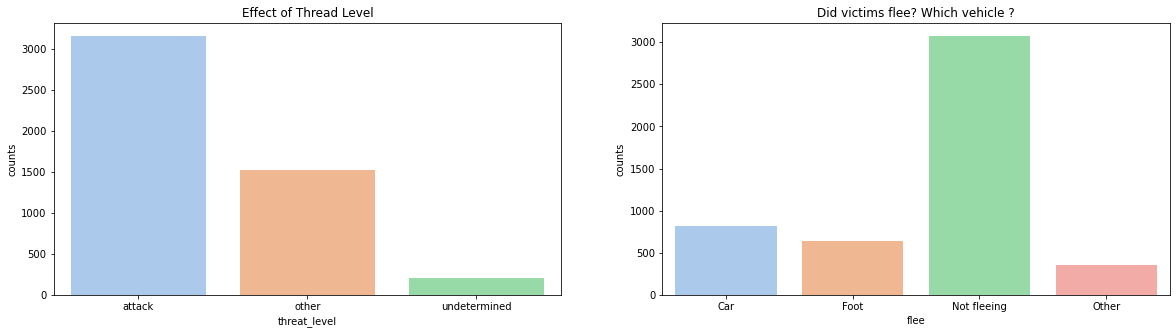

In [12]:
plt.figure(figsize = (20,5))
plt.subplot(121)
sns.barplot(x= threat_lev.index, y = threat_lev.counts, data= threat_lev, palette = "pastel")
plt.title("Effect of Thread Level")

plt.subplot(122)
sns.barplot(x= flee.index, y = flee.counts, data= flee, palette = "pastel")
plt.title("Did victims flee? Which vehicle ?")
plt.show()

There is a certain percentage of deaths among victims who did not run away and attacked the police.

**THREAD LEVEL - FLEE İLİŞİKİSİ CHİ-SQUARE TEST**

In [13]:
attack_raw = df.iloc[df[df.threat_level == "attack"].index]
attack = attack_raw.flee.value_counts()

chi = pd.DataFrame(index = attack.index)
chi["Attack"] = attack

attack_raw = df.iloc[df[df.threat_level == "other"].index]
attack = attack_raw.flee.value_counts()
chi["other"] = attack

attack_raw = df.iloc[df[df.threat_level == "undetermined"].index]
attack = attack_raw.flee.value_counts()
chi["undetermined"] = attack

chi

,Attack,other,undetermined
Not fleeing,2007,967,99
Car,533,253,34
Foot,414,194,34
Other,206,114,40


In [14]:
pd.set_option('float_format', '{:.2f}'.format)

In [15]:
from scipy import stats

a1 = chi.Attack
a2 = chi.other
a3 = chi.undetermined

chi2_stat, p_val, dof, ex = stats.chi2_contingency([a1,a2,a3])
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
53.05796458417224


===Degrees of Freedom===
6


===P-Value===
1.1421743019136192e-09


===Contingency Table===
[[1983.79570991  529.35648621  414.4473953   232.40040858]
 [ 959.25311542  255.96731359  200.40367722  112.37589377]
 [ 129.95117467   34.6762002    27.14892748   15.22369765]]


P- value < 0.05 -> We are choosing alternative theorem and it means threat_level and flee dependent each other.

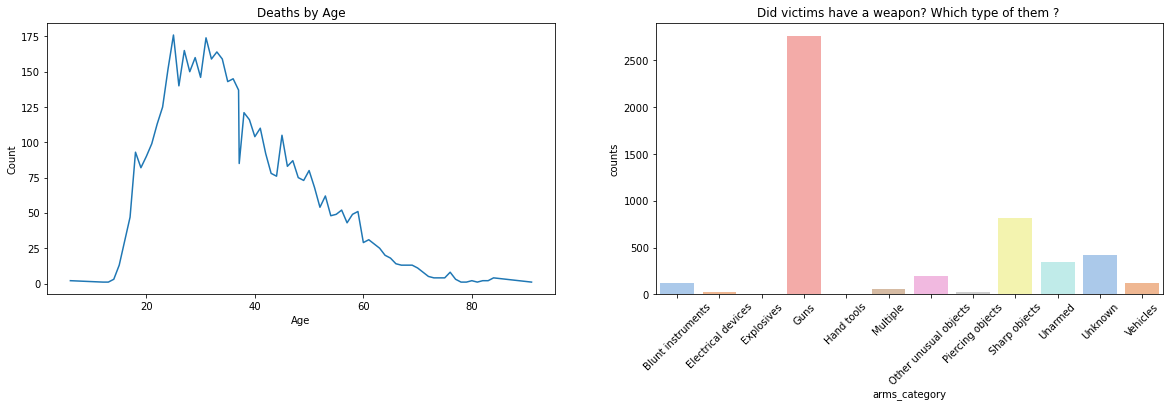

In [16]:
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.plot(age)
plt.title("Deaths by Age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(122)
sns.barplot(x= arms_category.index, y = arms_category.counts, data= arms_category , palette = "pastel")
plt.title("Did victims have a weapon? Which type of them ? ")
plt.xticks(rotation = 45)
plt.show()

Younger people are most common case of deaths and big percentage of deaths have a weapon at Guns category.

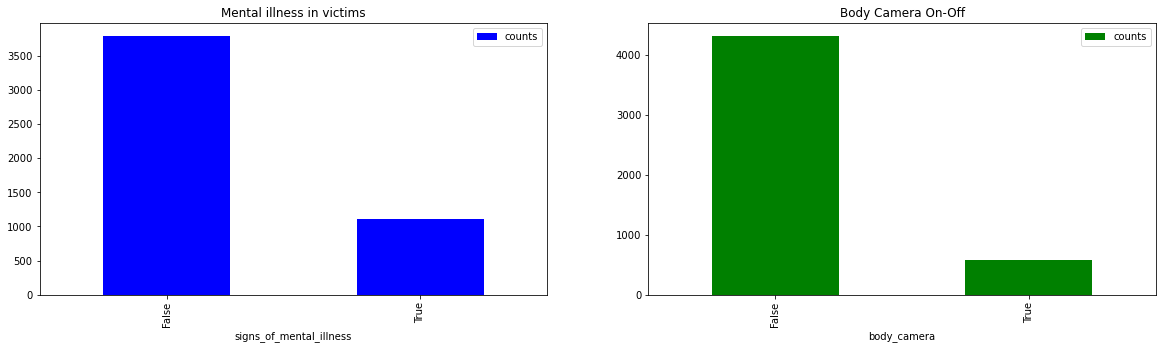

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)
signs_of_mental_illness.plot.bar(ax=axes[0],figsize=(20,5), title = "Mental illness in victims", color = ["blue"] )
body_camera.plot.bar(ax=axes[1],title = "Body Camera On-Off", color = ["green"] )
plt.show()

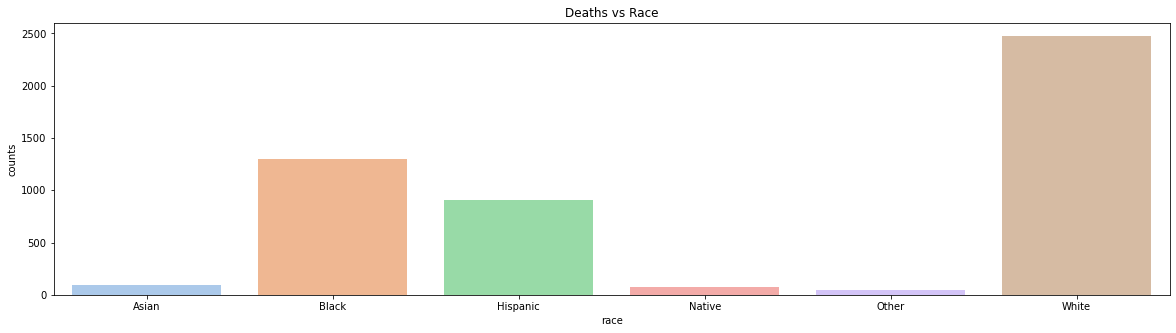

In [18]:
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race,palette = "pastel")
plt.title("Deaths vs Race")
plt.show()

**END OF LOOKOUT**

**First condition : I listed under 40 age persons who have (GUNS) with thread level (HIGH) and (NOT have MENTAL ILLNESS), When body camera (off).**

In [19]:
first_df = (df.iloc[df[(df.arms_category == "Guns") & (df.threat_level == "attack")& (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False)& (df.body_camera == False)  & (df.age < 40)].index])
first_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,date_time
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.00,M,White,Guthrie,OK,False,attack,Not fleeing,False,Guns,2015-01-04
7,15,Brock Nichols,2015-01-06,shot,gun,35.00,M,White,Assaria,KS,False,attack,Not fleeing,False,Guns,2015-01-06
11,21,Ron Sneed,2015-01-07,shot,gun,31.00,M,Black,Freeport,TX,False,attack,Not fleeing,False,Guns,2015-01-07
20,325,Andy Martinez,2015-01-09,shot,gun,33.00,M,Hispanic,El Paso,TX,False,attack,Not fleeing,False,Guns,2015-01-09
22,43,Brian Barbosa,2015-01-11,shot,gun,23.00,M,Hispanic,South Gate,CA,False,attack,Not fleeing,False,Guns,2015-01-11


In [20]:
def search(column_name, datfrm):

    data = datfrm.groupby(datfrm[column_name]).id.count()
    count = []
    for x in range(len(data)):
        count.append(data.iloc[x])
    data = pd.DataFrame(index = data.index)
    data["counts"] = count
    return data

In [21]:
race = search("race",first_df)

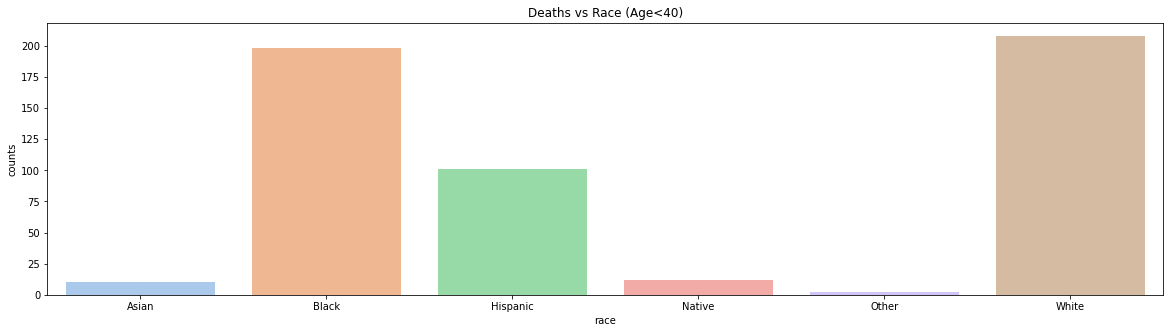

In [22]:
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race , palette = "pastel")
plt.title("Deaths vs Race (Age<40)")
plt.show()

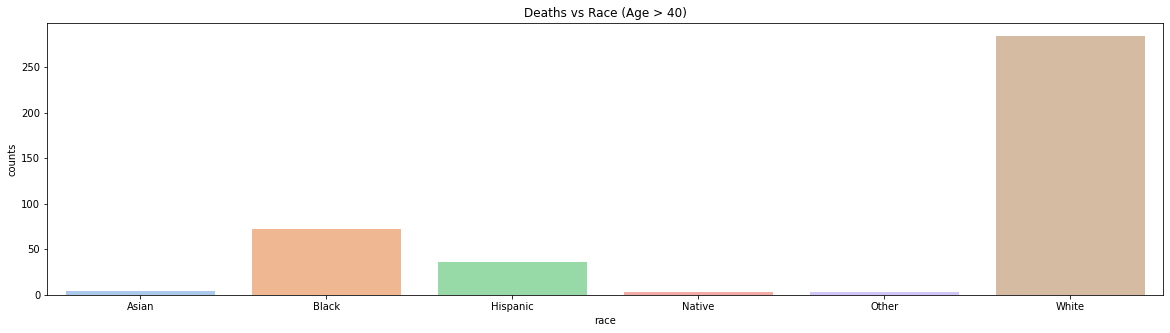

In [23]:
first_df = (df.iloc[df[(df.arms_category == "Guns") & (df.threat_level == "attack")& (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False)& (df.body_camera == False)  & (df.age > 40)].index])
first_df.head()
race = search("race",first_df)
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race , palette = "pastel")
plt.title("Deaths vs Race (Age > 40)")
plt.show()

There is certain white victims at between 40 and 80 age. At the same way, we can easily say there is certain percentage is non-white people at under 40 age.

**Second Condition : Under 40 age persons who are not fleeing, not have mental illness when police's body cameras off.**

In [24]:
second_df = (df.iloc[df[(df.arms_category == "Unknown") & (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False) & (df.body_camera == False) & (df.age < 40) ].index])
second_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,date_time
15,29,Loren Simpson,2015-01-08,shot,unknown,28.00,M,White,Huntley,MT,False,undetermined,Not fleeing,False,Unknown,2015-01-08
26,49,Marcus Golden,2015-01-14,shot,unknown,24.00,M,Black,St. Paul,MN,False,attack,Not fleeing,False,Unknown,2015-01-14
27,50,Michael Goebel,2015-01-14,shot,unknown,29.00,M,White,Franklin County,MO,False,attack,Not fleeing,False,Unknown,2015-01-14
52,101,Demaris Turner,2015-01-23,shot,unknown,29.00,M,Black,Fort Lauderdale,FL,False,other,Not fleeing,False,Unknown,2015-01-23
59,20,Jessie Hernandez,2015-01-26,shot,unknown,17.00,F,Hispanic,Denver,CO,False,other,Not fleeing,False,Unknown,2015-01-26


In [25]:
race = search("race" , second_df)

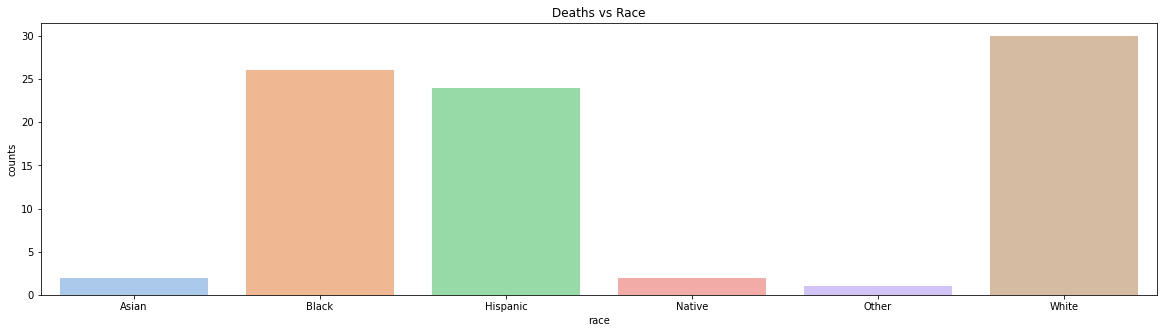

In [26]:
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race")
plt.show()

When the weapon is unknown at under 40 age, Hispanic victims have biggest percentage for now.

**Third condition : I listed under 40 age persons who have (GUNS) with thread level (HIGH) and (NOT have MENTAL ILLNESS), When body camera (off) in Florida.**

In [27]:
third_df = (df.iloc[df[(df.arms_category == "Guns") & (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False) & (df.body_camera == False) & (df.age < 40) & (df.state == "MD")].index])
third_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,date_time
156,197,Fednel Rhinvil,2015-03-03,shot,gun,25.00,M,Black,Salisbury,MD,False,attack,Not fleeing,False,Guns,2015-03-03
835,1000,Ryan Quinn Martin,2015-11-11,shot,gun,32.00,M,Black,Baltimore,MD,False,attack,Not fleeing,False,Guns,2015-11-11
1166,1379,Jacai Colson,2016-03-13,shot,gun,28.00,M,Black,Landover,MD,False,other,Not fleeing,False,Guns,2016-03-13
1216,1424,Kimani Johnson,2016-03-31,shot,gun,18.00,M,Black,Baltimore,MD,False,attack,Not fleeing,False,Guns,2016-03-31
1261,1475,Rico Don Rae Johnson,2016-04-18,shot,gun,28.00,M,Black,Greenbelt,MD,False,attack,Not fleeing,False,Guns,2016-04-18


In [28]:
race = search("race" , third_df)

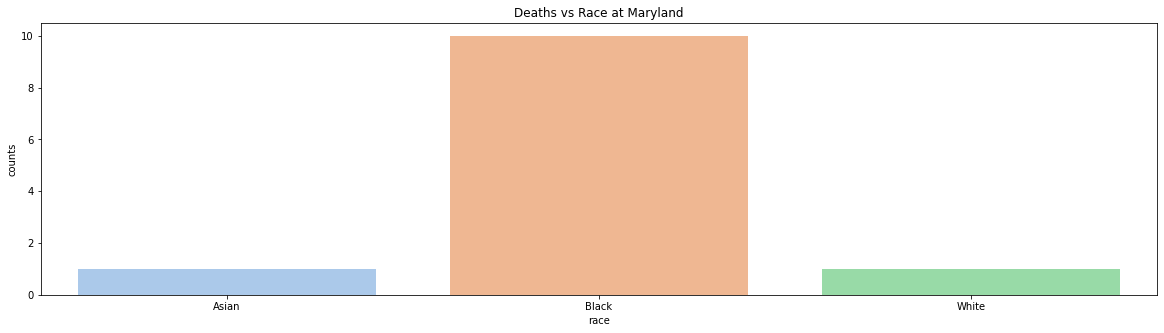

In [29]:
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race at Maryland")
plt.show()

In US total black people population 12.3% so we should look cities which black people live the most. Maryland have 29.4% Black people population (1,776,692 person).

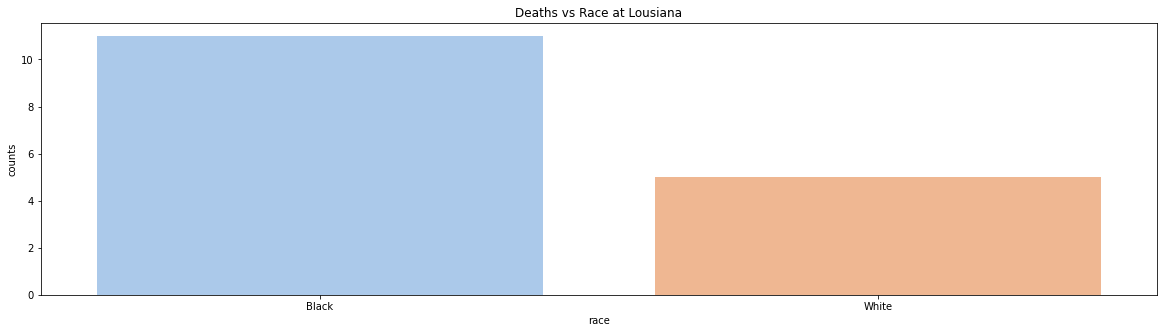

In [30]:
third_df = (df.iloc[df[(df.arms_category == "Guns") & (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False) & (df.body_camera == False) & (df.age < 40) & (df.state == "LA")].index])
third_df.head()
race = search("race" , third_df)
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race at Lousiana")
plt.show()

Lousiana have 32.1% with have 1,505,991 black people population.

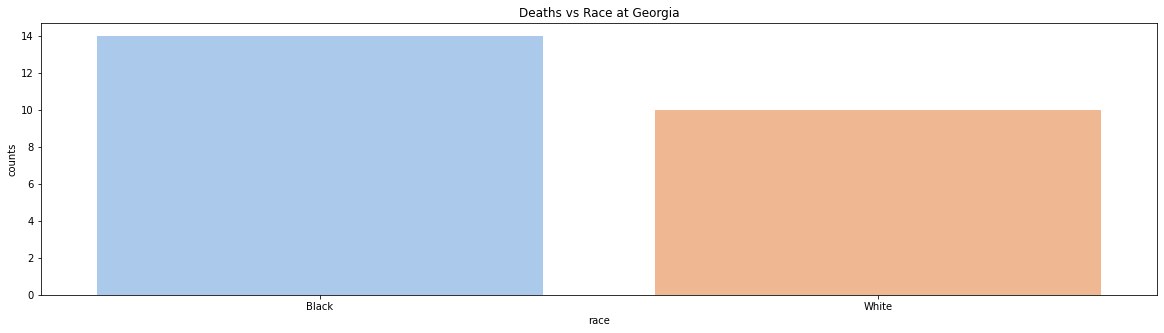

In [31]:
third_df = (df.iloc[df[(df.arms_category == "Guns") & (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False) & (df.body_camera == False) & (df.age < 40) & (df.state == "GA")].index])
third_df.head()
race = search("race" , third_df)
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race at Georgia")
plt.show()

Georgia have 31.1% with have 3,245,371 black people population.

In [32]:
first_df = (df.iloc[df[(df.arms_category == "Guns") & (df.threat_level == "attack")& (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False)& (df.body_camera == False)  & (df.age < 40)].index])

In [33]:
mappin = search("state",first_df)
mappin = mappin.reset_index()

In [34]:
b_df = (df.iloc[df[(df.arms_category == "Guns") & (df.threat_level == "attack")& (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False)& (df.body_camera == False)  & (df.age < 40) & (df.race == "Black")].index])
b_df = search("state",b_df)
b_df = b_df.reset_index()
b_df.head()

,state,counts
0,AK,1
1,AL,5
2,AR,3
3,AZ,3
4,CA,12


In [35]:
lst = []
for x in mappin.state:
    a = b_df.loc[b_df.state == x].counts
    b = mappin.loc[mappin.state == x].counts
    a = pd.Series.tolist(a)
    b = pd.Series.tolist(b)
    if a == []:
        a.append(0)
    
    
    if (a[0] > 0) and (b[0] > 0):
        z = a[0]*100/b[0]
        lst.append(z)
    else:
        lst.append(0)
mappin["b"] = lst

In [36]:
# Import libraries
import pandas as pd
import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('data/us-states.json')
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data


 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=mappin,
 columns=["state", "b"],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Percantage of Victims black persons who shoted by Police (Age < 40)'
)
folium.LayerControl().add_to(m)

**PERCANTAGE OF VICTIMS BLACK PERSONS WHO SHOOTED BY POLICE AGE<40**

In [37]:
m

In [38]:
popu = pd.DataFrame(index = mappin.state)
mappin["population_perc"] = [2.9,26.7,15.2,4.1,5.5,3.9,9.9,45.3,21.5,15.4,31.1,1.6,3.3,0.6,14.0,9.2,5.5,8.0,32.1,7.0,29.4,1.2,13.6,6.4,11.4,37.9,0.4,21.2,3.0,4.5,1.3,12.8,1.8,8.3,8.7,12.2,7.2,1.8,10.7,26.8,1.9,16.6,11.8,1.2,18.8,1.2,3.5,6.3,3.9,0.9] 

In [39]:

# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('data/us-states.json')
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data


 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=mappin,
 columns=["state", "population_perc"],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Percantage of Black Population in US'
)
folium.LayerControl().add_to(m)

**PERCANTAGE OF BLACK POPULATION IN US**

In [40]:
m

In [41]:
first_df = (df.iloc[df[(df.arms_category == "Guns") & (df.threat_level == "attack")& (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False)& (df.body_camera == False)].index])
mappin1 = search("state",first_df)
mappin1 = mappin1.reset_index()
w_df = (df.iloc[df[(df.arms_category == "Guns") & (df.threat_level == "attack")& (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False)& (df.body_camera == False)  & (df.race == "White")].index])
w_df = search("state",w_df)
w_df = w_df.reset_index()

In [42]:
lst = []
for x in mappin1.state:
    a = w_df[w_df.state == x].counts
    b = mappin1[mappin1.state == x].counts
    a = pd.Series.tolist(a)
    b = pd.Series.tolist(b)
    if a == []:
        a.append(0)
    
    
    if (a[0] > 0) and (b[0] > 0):
        z = a[0]*100/b[0]
        lst.append(z)
    else:
        lst.append(0)
        
mappin1["w"] = lst

In [43]:

# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('data/us-states.json')
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data


 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=mappin1,
 columns=["state", "w"],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Percantage of Victims white persons who shoted by Police (All Age)'
)
folium.LayerControl().add_to(m)

**PERCANTAGE OF VICTIMS WHITE PERSONS WHO SHOTED BY POLICE (ALL AGE)**

In [44]:
m

In [45]:
first_df = (df.iloc[df[(df.arms_category == "Guns") & (df.threat_level == "attack")& (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False)& (df.body_camera == False)  & (df.age > 40)].index])
mappin1 = search("state",first_df)
mappin1 = mappin1.reset_index()
w_df = (df.iloc[df[(df.arms_category == "Guns") & (df.threat_level == "attack")& (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False)& (df.body_camera == False)  & (df.age > 40) & (df.race == "White")].index])
w_df = search("state",w_df)
w_df = w_df.reset_index()
w_df.head()

,state,counts
0,AK,2
1,AL,9
2,AR,11
3,AZ,15
4,CA,18


In [46]:
lst = []
for x in mappin1.state:
    a = w_df.loc[w_df.state == x].counts
    b = mappin1.loc[mappin1.state == x].counts
    a = pd.Series.tolist(a)
    b = pd.Series.tolist(b)
    if a == []:
        a.append(0)
    
    
    if (a[0] > 0) and (b[0] > 0):
        z = a[0]*100/b[0]
        lst.append(z)
    else:
        lst.append(0)
mappin1["w"] = lst

In [47]:
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = os.path.join('data/us-states.json')
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data


 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=mappin1,
 columns=["state", "w"],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Percantage of Victims white persons who shoted by Police (Age > 40)'
)
folium.LayerControl().add_to(m)

**PERCANTAGE OF VICTIMS WHITE PERSONS WHO SHOOTED BY POLICE (AGE > 40)**

In [48]:
m

**Extracting Outliers**

In [49]:
most_pop = pd.DataFrame(mappin.sort_values(by = 'population_perc' , ascending=False).iloc[:15].state)

In [50]:
lst = []
for i in range(df.shape[0]):
    dummy = 0
    for j in range(most_pop.shape[0]):
        if df.state.iloc[i] in most_pop.state.iloc[j]:
            dummy = 1 
            lst.append(1)
    if dummy == 0:
        lst.append(0)

df["is_top_states"] = lst        

In [51]:
df.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,date_time,is_top_states
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.00,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,2020-06-12,1
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.00,M,Black,Crown Point,IN,False,attack,Car,False,Guns,2020-06-12,0
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.00,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,2020-06-13,0
4893,5921,William Slyter,2020-06-13,shot,gun,22.00,M,White,Kansas City,MO,False,other,Other,False,Guns,2020-06-13,0
4894,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.00,M,White,Lawrence,KS,False,attack,Car,False,Guns,2020-06-15,0


In [52]:
first_df = (df.iloc[df[(df.arms_category == "Guns") & (df.threat_level == "attack")& (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False)& (df.body_camera == False) &(df.is_top_states == 1) & (df.age < 40)].index])

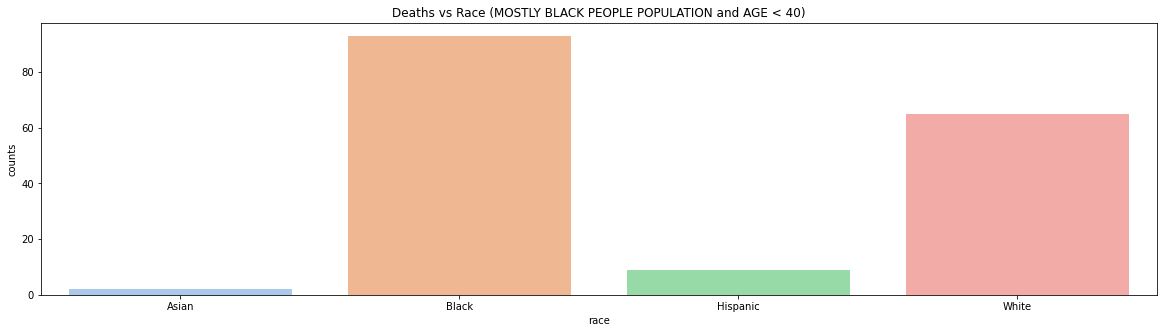

In [53]:
race = search("race",first_df)
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race (MOSTLY BLACK PEOPLE POPULATION and AGE < 40)")
plt.show()

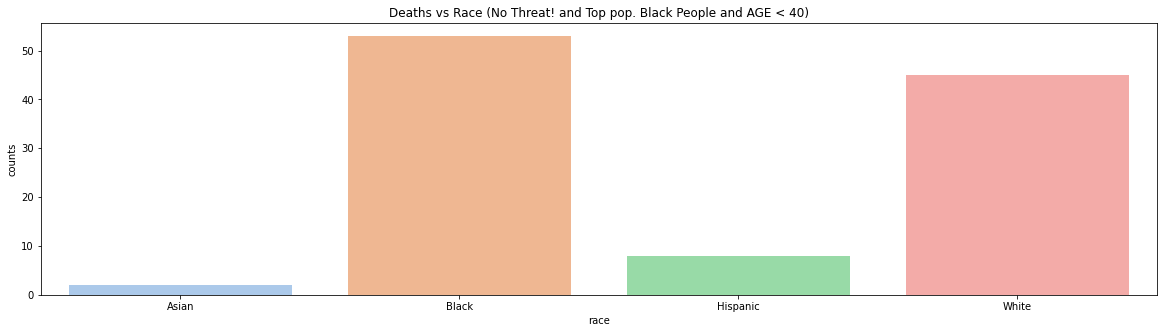

In [54]:
first_df = (df.iloc[df[ (df.threat_level != "attack") & (df.flee == "Not fleeing") & (df.signs_of_mental_illness == False)& (df.body_camera == False) &(df.is_top_states == 1) & (df.age < 40)].index])
race = search("race",first_df)
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race (No Threat! and Top pop. Black People and AGE < 40)")
plt.show()

**BODY CAMERA VS STATES and DEATHS**

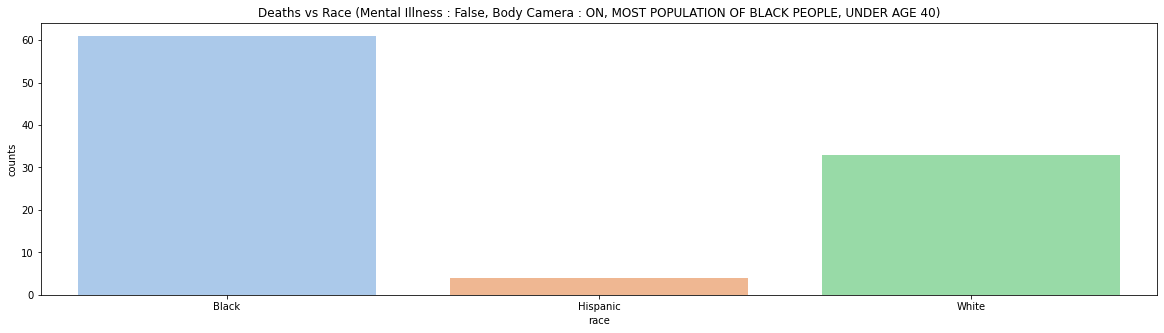

In [55]:
first_df = (df.iloc[df[(df.signs_of_mental_illness == False) & (df.body_camera == True) & (df.is_top_states == 1)  &(df.age < 40)].index])
race = search("race",first_df)
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race (Mental Illness : False, Body Camera : ON, MOST POPULATION OF BLACK PEOPLE, UNDER AGE 40)")
plt.show()

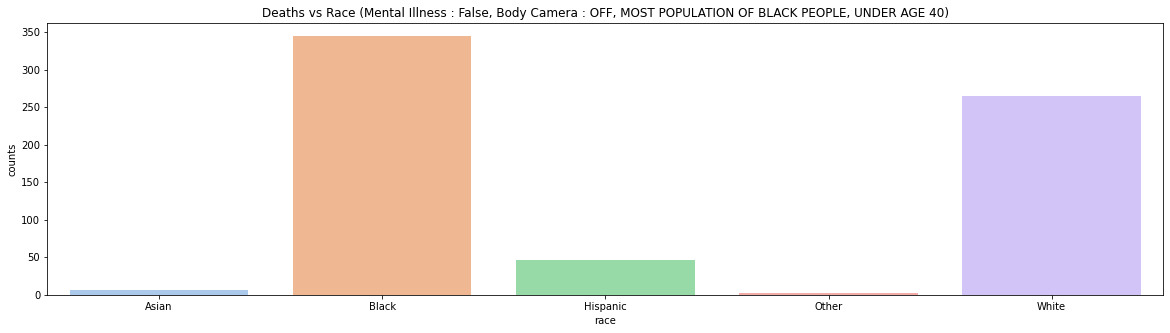

In [56]:
first_df = (df.iloc[df[(df.signs_of_mental_illness == False) & (df.body_camera == False) & (df.is_top_states == 1)  &(df.age < 40)].index])
race = search("race",first_df)
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race (Mental Illness : False, Body Camera : OFF, MOST POPULATION OF BLACK PEOPLE, UNDER AGE 40)")
plt.show()

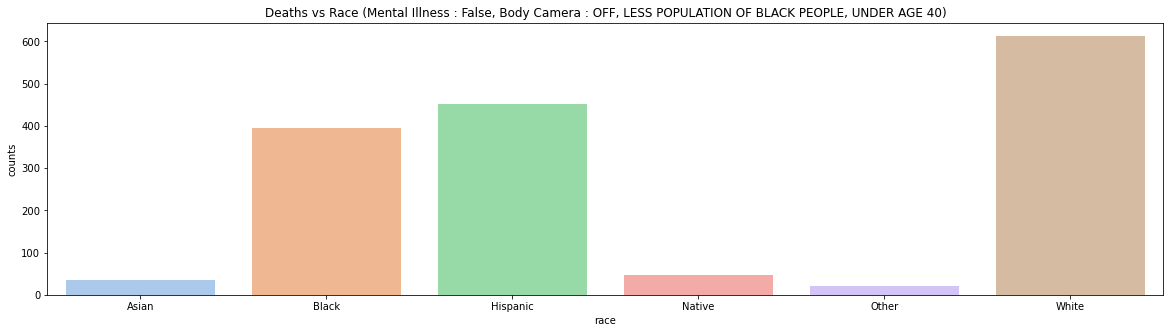

In [57]:
first_df = (df.iloc[df[(df.signs_of_mental_illness == False) & (df.body_camera == False) & (df.is_top_states == 0)  &(df.age < 40)].index])
race = search("race",first_df)
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race (Mental Illness : False, Body Camera : OFF, LESS POPULATION OF BLACK PEOPLE, UNDER AGE 40)")
plt.show()

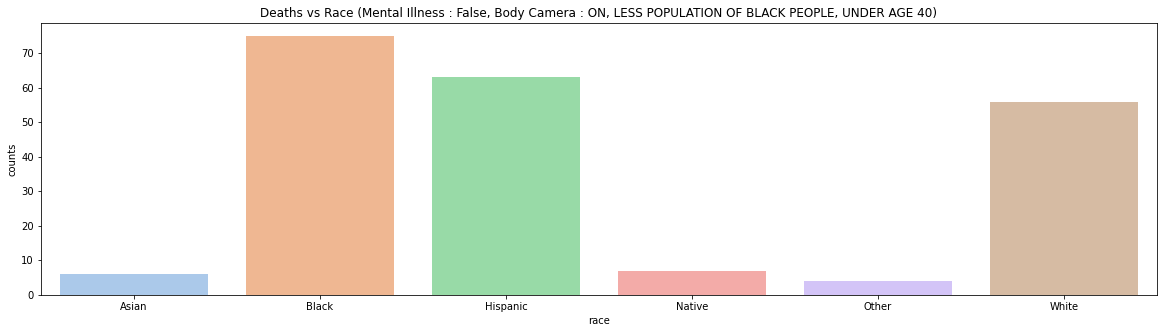

In [58]:
first_df = (df.iloc[df[(df.signs_of_mental_illness == False) & (df.body_camera == True) & (df.is_top_states == 0)  &(df.age < 40)].index])
race = search("race",first_df)
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race (Mental Illness : False, Body Camera : ON, LESS POPULATION OF BLACK PEOPLE, UNDER AGE 40)")
plt.show()

**MENTAL ILLNESS**

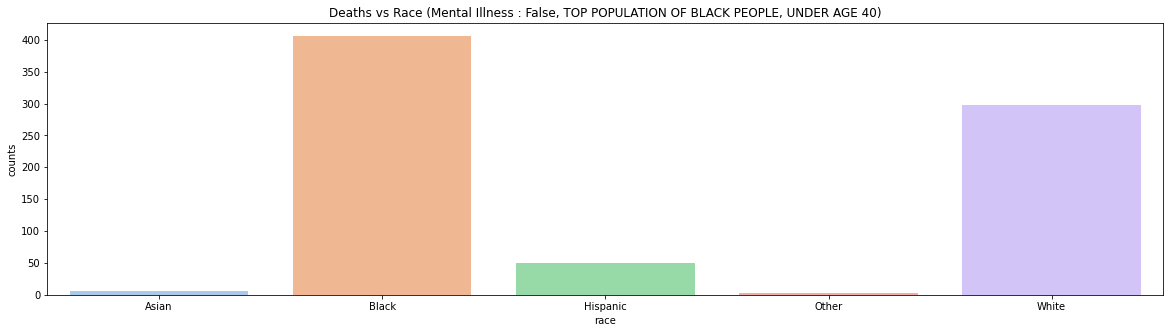

In [59]:
first_df = (df.iloc[df[(df.is_top_states == 1) & (df.age < 40) & (df.signs_of_mental_illness == False)].index])
race = search("race",first_df)
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race (Mental Illness : False, TOP POPULATION OF BLACK PEOPLE, UNDER AGE 40)")
plt.show()

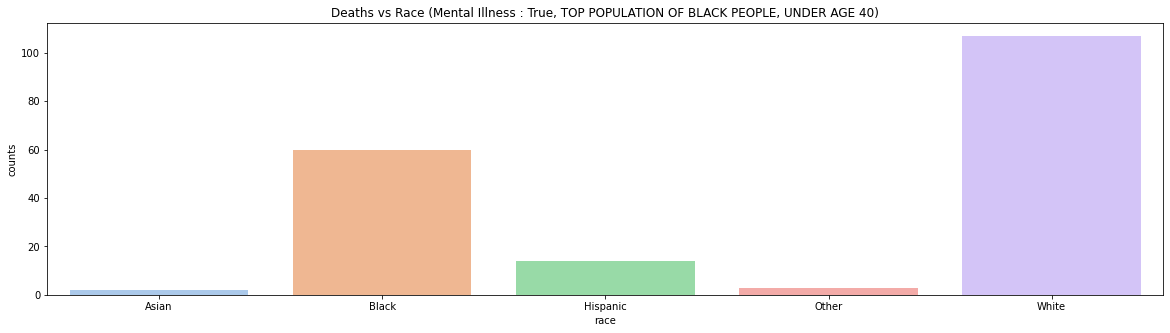

In [60]:
first_df = (df.iloc[df[(df.is_top_states == 1) & (df.age < 40) & (df.signs_of_mental_illness == True)].index])
race = search("race",first_df)
plt.figure(figsize = (20,5))
sns.barplot(x= race.index, y = race.counts, data= race, palette = "pastel")
plt.title("Deaths vs Race (Mental Illness : True, TOP POPULATION OF BLACK PEOPLE, UNDER AGE 40)")
plt.show()

**Date and Race**

In [61]:
def race_time_high(race):
    first_df = (df.iloc[df[(df.is_top_states == 1) & (df.age < 40) & (df.signs_of_mental_illness == False) & (df.race == race)].index])
    date_b = pd.DataFrame(first_df.groupby(first_df.date_time.dt.year).count())
    date_b = pd.DataFrame(index = date_df.index)
    lst = []
    for x in range(len(date_b)):
        lst.append(first_df.groupby(first_df.date_time.dt.year).count().id.iloc[x])
    
    date_b["counts"] = lst
    plt.figure(figsize = (10,5))
    sns.barplot(x = date_b.index, y = date_b.counts, data = date_b,  palette = "pastel")
    plt.title("{} people died who shots by US Police per Year in high black population states".format(race))
    plt.show()

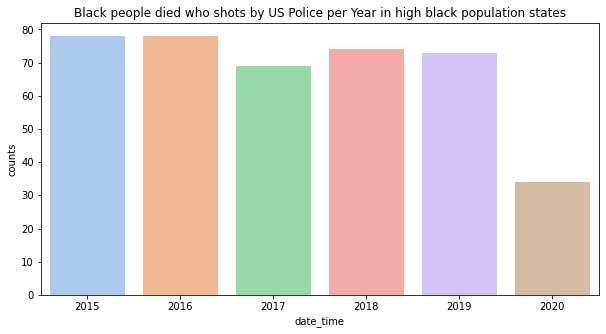

In [62]:
race_time_high("Black")

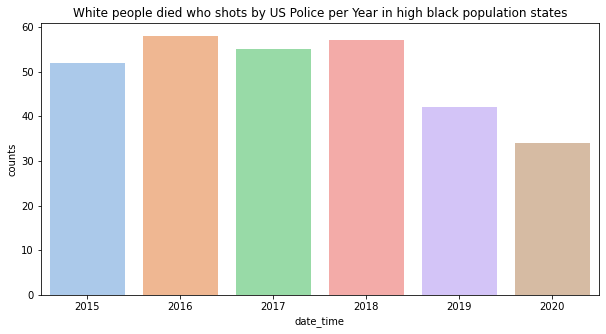

In [63]:
race_time_high("White")

In [64]:
def race_time_low(race):
    first_df = (df.iloc[df[(df.is_top_states == 0) & (df.age < 40) & (df.signs_of_mental_illness == False) & (df.race == race)].index])
    date_b = pd.DataFrame(first_df.groupby(first_df.date_time.dt.year).count())
    date_b = pd.DataFrame(index = date_df.index)
    lst = []
    for x in range(len(date_b)):
        lst.append(first_df.groupby(first_df.date_time.dt.year).count().id.iloc[x])
    
    date_b["counts"] = lst
    plt.figure(figsize = (10,5))
    sns.barplot(x = date_b.index, y = date_b.counts, data = date_b,  palette = "pastel")
    plt.title("{} people died who shots by US Police per Year in low black population states".format(race))
    plt.show()

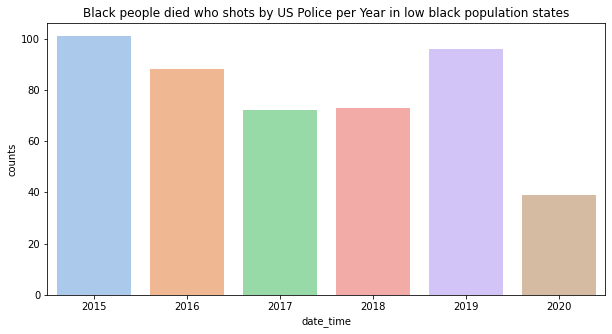

In [65]:
race_time_low("Black")

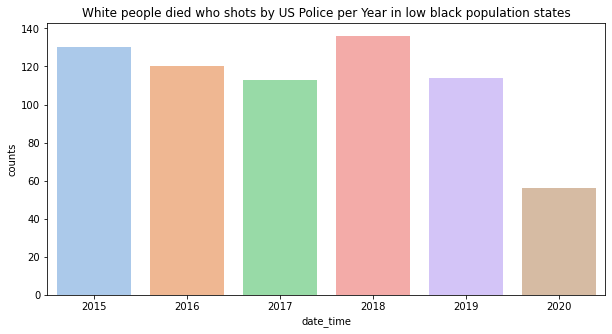

In [66]:
race_time_low("White")

# Conclusions

When we talk about US Police shootings for every US states, we saw that White people is killed much more from other races by police. On the other hand, if we take into account that the African-American people make up only 12.3 percent of the US population and we want to see the interracial reaction of the police, we should choose states with mixed populations.

I observe that this ratio has changed in states with the highest black population and black population have biggest ratio on deaths.
